In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/drive/MyDrive/chest_xray/train')
test = get_training_data('/content/drive/MyDrive/chest_xray/test')
val = get_training_data('/content/drive/MyDrive/chest_xray/val')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



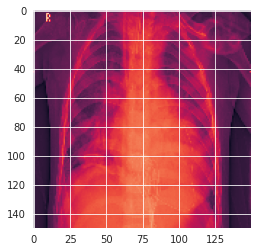

In [87]:
plt.imshow(train[0][0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


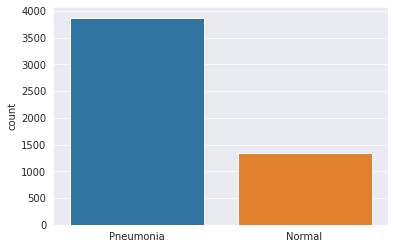

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l) 

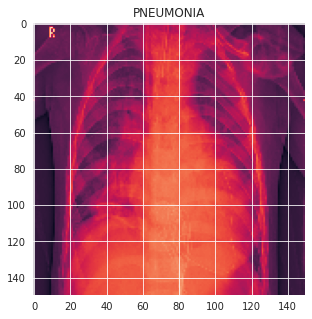

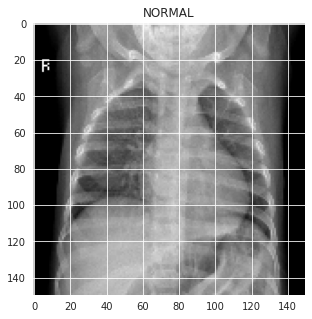

In [86]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]]);

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
type(x_train)

list

In [ ]:
x_train_arr = np.array(x_train)

In [ ]:
x_test_arr = np.array(x_test)

In [ ]:
#x_train_test.shape

In [ ]:
from sklearn.preprocessing import Normalizer 

In [ ]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.7.
The scikit-learn version is 1.0.2.


In [ ]:
#this is about wjere 

In [ ]:
train[0][0].max(axis=(0,1))

253

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss

In [ ]:
from sklearn.decomposition import PCA, NMF, FactorAnalysis

In [ ]:
x_train_r = x_train_arr.reshape(5216, 22500)

In [ ]:
x_test_r = x_test_arr.reshape(624, 22500)

In [ ]:
x_train_r.shape


(5216, 22500)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x_train_ss = scaler.fit_transform(x_train_r)

x_test_ss = scaler.transform(x_test_r)

In [ ]:
x_train_ss

array([[-0.15212669, -0.24597799, -0.14148533, ...,  0.75895635,
         0.75211377,  0.70264568],
       [-0.91597833, -0.92948245, -1.00900282, ..., -0.57001125,
        -0.54824428, -0.53133202],
       [-0.3570625 , -0.44602808, -0.43065783, ...,  2.45879862,
         2.91937718,  1.0757087 ],
       ...,
       [ 0.68624706,  0.43752646,  0.55252866, ..., -0.57001125,
        -0.54824428, -0.53133202],
       [ 0.07143964,  0.12078049,  0.51397232, ..., -0.57001125,
        -0.54824428, -0.53133202],
       [-0.91597833, -0.92948245, -1.02828098, ..., -0.57001125,
        -0.54824428, -0.53133202]])

In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix, 
                             plot_confusion_matrix, roc_curve, auc,
                             roc_auc_score, f1_score)

from time import time 

In [ ]:
# We fit the first logistic regression without modifying the X
t0 = time()
clf = LogisticRegression()
clf.fit (x_train_ss, y_train)
print(f"With {x_train_ss.shape[1]} variables it is done in %0.3fs" % (time() - t0))
print(f'score : {round(clf.score(x_test_ss, y_test), 3)}')

With 22500 variables it is done in 20.662s
score : 0.772


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# We first apply PCA on X before fitting the logistic regression
dim = PCA(400)
x_train_PCA = dim.fit_transform(x_train_ss)
x_test_PCA = dim.transform(x_test_ss)


In [ ]:
t0 = time()
clf = LogisticRegression()
clf.fit (x_train_PCA, y_train)
print("With 400 variables, it is done in %0.3fs" % (time() - t0))
print(f"score: {round(clf.score(x_test_PCA, y_test), 3)}")

With 400 variables, it is done in 0.358s
score: 0.748


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate

In [ ]:
cv_results = cross_validate(
                    estimator=clf,
                    X=x_train_PCA,
                    y=y_train,
                    cv=5,
                    return_train_score=True
)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cv_results

{'fit_time': array([0.23681545, 0.27581096, 0.3440609 , 0.65289474, 0.60796142]),
 'score_time': array([0.00250196, 0.00180674, 0.01133084, 0.02347898, 0.00324774]),
 'test_score': array([0.95210728, 0.93096836, 0.92809204, 0.92233941, 0.91658677]),
 'train_score': array([0.99496644, 1.        , 0.99808291, 0.99928109, 0.99904146])}

In [ ]:
cv_results['train_score']

array([0.99496644, 1.        , 0.99808291, 0.99928109, 0.99904146])

In [ ]:
cv_results['test_score']

array([0.95210728, 0.93096836, 0.92809204, 0.92233941, 0.91658677])

In [56]:
def cv_overall(cv_results):
    val_results = cv_results['test_score']
    result_str = f'{val_results.mean():.3f} ± {val_results.std():.3f}'
    return result_str

In [ ]:
# # Let's save these results for later
# models = {}

# models['model_1'] = {'model': my_model, 'cv':cv_results}

In [ ]:
# # Adjust the regularization C (remember for logistical, smaller = stronger penalization )
# c_values = [1e-1, 1e2, 1e4, 1e6]

# #like above, could also try different solvers 
# #solver = ['sag', 'lbfgs', 'saga']

# # Start at #2 since we have "model_1" already
# for i, c in enumerate(c_values, start=2):
    
#     print(f'Model #{i} with C={c}')
#     new_model = LogisticRegression(C=c, max_iter=1e3)
    
#     # Cross-validation
#     print('Cross-validating model with training data...')
#     cv_results = cross_validate(
#                     estimator=new_model,
#                     X=x_train_PCA,
#                     y=y_train,
#                     #solver = ...
#                     cv=5,
#                     return_train_score=True
#     )
#     print(f'\tCross-Validation Score: {cv_overall(cv_results)}')
    
#     # Train/fit with the full training set
#     #print('Fitting model to full training set...')
#     #new_model.fit(x_train_PCA, y_train)
#     #train_score = new_model.score(x_train_PCA, y_train)
#     #print(f'\tScore on training set: {train_score:.3f}')
    
#     # Save results
#     print('Saving Results...')
#     models[f'model_{i}'] = {'model': new_model, 'cv': cv_results}
    
#     print('\n','-'*30,'\n')

In [ ]:
# best_model = models['model_2']['model']
# best_model

In [ ]:
# # Normalize the data
# x_train = np.array(x_train) / 253
# x_val = np.array(x_val) / 253
# x_test = np.array(x_test) / 253

In [57]:
#turn into arrays 
x_train = np.array(x_train) 
x_val = np.array(x_val) 
x_test = np.array(x_test) 

In [58]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [59]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)




(5216, 150, 150, 1)
(16, 150, 150, 1)
(624, 150, 150, 1)


In [60]:
train_img = x_train.reshape(x_train.shape[0], -1)
test_img = x_test.reshape(x_test.shape[0], -1)
val_img = x_val.reshape(x_val.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 22500)
(624, 22500)
(16, 22500)


In [61]:
y_train.shape

(5216,)

## Baseline CNN Model

In [62]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models


# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(22500,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, y_val))

Epoch 1/50
163/163 [==============================] - 2s 9ms/step - loss: 44646.0664 - accuracy: 0.7343 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 2/50
163/163 [==============================] - 1s 8ms/step - loss: 0.6098 - accuracy: 0.7429 - val_loss: 0.7304 - val_accuracy: 0.5000
Epoch 3/50
163/163 [==============================] - 1s 8ms/step - loss: 0.5894 - accuracy: 0.7429 - val_loss: 0.7526 - val_accuracy: 0.5000
Epoch 4/50
163/163 [==============================] - 1s 8ms/step - loss: 0.5798 - accuracy: 0.7429 - val_loss: 0.7710 - val_accuracy: 0.5000
Epoch 5/50
163/163 [==============================] - 1s 8ms/step - loss: 0.5750 - accuracy: 0.7429 - val_loss: 0.7856 - val_accuracy: 0.5000
Epoch 6/50
163/163 [==============================] - 1s 7ms/step - loss: 0.5726 - accuracy: 0.7429 - val_loss: 0.7966 - val_accuracy: 0.5000
Epoch 7/50
163/163 [==============================] - 1s 8ms/step - loss: 0.5714 - accuracy: 0.7429 - val_loss: 0.8047 - val_accuracy: 0.5000
Ep

In [64]:
results_train = model.evaluate(train_img, y_train)

163/163 [==============================] - 1s 5ms/step - loss: 0.5700 - accuracy: 0.7429


In [65]:
results_test = model.evaluate(test_img, y_test)

20/20 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.6250


In [66]:
results_train

[0.569994330406189, 0.7429064512252808]

In [67]:
results_test

[0.6952039003372192, 0.625]

## Build a CNN from Index nb

In [68]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

## Build a CNN

In [69]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150 ,150,  1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [ ]:
# Normalize the data
# x_train = np.array(x_train) / 253
# x_val = np.array(x_val) / 253
# x_test = np.array(x_test) / 253

In [ ]:

#learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
#This was taking forever 
# history = model.fit(x_train,
#                     y_train,
#                     epochs=15,
#                     batch_size=32,
#                     validation_data=(x_val, y_val))

In [70]:
model = Sequential()
# We will start with our trusty sigmoid function.
# What does input dimension correspond to?
model.add(Dense(12, activation='sigmoid', input_dim=22500))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD' ,
              # We use binary_crossentropy for a binary loss function
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assign the variable history to store the results,
# and set verbose=1 so we can see the output. To see
# only the metrics at the end of each epoch, set verbose=2.
results = model.fit(train_img, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
53/53 [==============================] - 1s 17ms/step - loss: 0.7021 - accuracy: 0.5052
Epoch 2/10
53/53 [==============================] - 1s 15ms/step - loss: 0.6231 - accuracy: 0.7429
Epoch 3/10
53/53 [==============================] - 1s 15ms/step - loss: 0.5932 - accuracy: 0.7429
Epoch 4/10
53/53 [==============================] - 1s 15ms/step - loss: 0.5804 - accuracy: 0.7429
Epoch 5/10
53/53 [==============================] - 1s 15ms/step - loss: 0.5745 - accuracy: 0.7429
Epoch 6/10
53/53 [==============================] - 1s 16ms/step - loss: 0.5723 - accuracy: 0.7429
Epoch 7/10
53/53 [==============================] - 1s 15ms/step - loss: 0.5712 - accuracy: 0.7429
Epoch 8/10
53/53 [==============================] - 1s 15ms/step - loss: 0.5706 - accuracy: 0.7429
Epoch 9/10
53/53 [==============================] - 1s 15ms/step - loss: 0.5703 - accuracy: 0.7429
Epoch 10/10
53/53 [==============================] - 1s 14ms/step - loss: 0.5702 - accuracy: 0.7429


In [71]:
results.__dict__

{'_chief_worker_only': None,
 '_supports_tf_logs': False,
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'history': {'accuracy': [0.5051763653755188,
   0.7429064512252808,
   0.7429064512252808,
   0.7429064512252808,
   0.7429064512252808,
   0.7429064512252808,
   0.7429064512252808,
   0.7429064512252808,
   0.7429064512252808,
   0.7429064512252808],
  'loss': [0.7020615935325623,
   0.6230888962745667,
   0.5931508541107178,
   0.5803766250610352,
   0.5745028257369995,
   0.5723472237586975,
   0.5711548924446106,
   0.5705864429473877,
   0.5702939629554749,
   0.5701500773429871]},
 'model': <keras.engine.sequential.Sequential at 0x7f14835068d0>,
 'params': {'epochs': 10, 'steps': 53, 'verbose': 1},
 'validation_data': None}

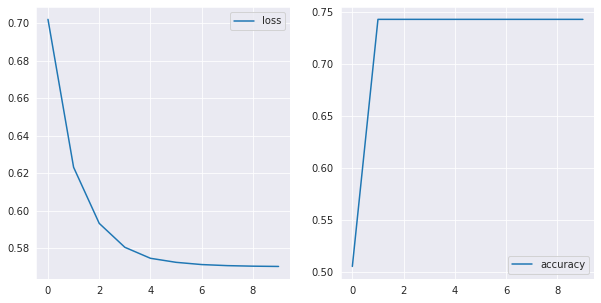

In [72]:
sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(x=results.epoch, y=sigmoid_accuracy, ax=ax2, label='accuracy');

In [73]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=22500))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assign the variable history to store the results,
# and set verbose=1 so we can see the output.
results = model.fit(train_img, y_train, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
53/53 [==============================] - 1s 15ms/step - loss: 1071.9508 - accuracy: 0.7331
Epoch 2/100
53/53 [==============================] - 1s 15ms/step - loss: 0.6557 - accuracy: 0.7429
Epoch 3/100
53/53 [==============================] - 1s 15ms/step - loss: 0.6370 - accuracy: 0.7429
Epoch 4/100
53/53 [==============================] - 1s 15ms/step - loss: 0.6224 - accuracy: 0.7429
Epoch 5/100
53/53 [==============================] - 1s 15ms/step - loss: 0.6110 - accuracy: 0.7429
Epoch 6/100
53/53 [==============================] - 1s 15ms/step - loss: 0.6023 - accuracy: 0.7429
Epoch 7/100
53/53 [==============================] - 1s 15ms/step - loss: 0.5957 - accuracy: 0.7429
Epoch 8/100
53/53 [==============================] - 1s 15ms/step - loss: 0.5903 - accuracy: 0.7429
Epoch 9/100
53/53 [==============================] - 1s 16ms/step - loss: 0.5862 - accuracy: 0.7429
Epoch 10/100
53/53 [==============================] - 1s 15ms/step - loss: 0.5829 - accuracy: 0.7

In [74]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=22500))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assign the variable history to store the results,
# and set verbose=1 so we can see the output.
results = model.fit(train_img, y_train, epochs=100, batch_size=None, verbose=1)

Epoch 1/100
163/163 [==============================] - 2s 8ms/step - loss: 4818.4038 - accuracy: 0.7404
Epoch 2/100
163/163 [==============================] - 1s 7ms/step - loss: 0.6112 - accuracy: 0.7429
Epoch 3/100
163/163 [==============================] - 1s 7ms/step - loss: 0.5900 - accuracy: 0.7429
Epoch 4/100
163/163 [==============================] - 1s 7ms/step - loss: 0.5798 - accuracy: 0.7429
Epoch 5/100
163/163 [==============================] - 1s 7ms/step - loss: 0.5749 - accuracy: 0.7429
Epoch 6/100
163/163 [==============================] - 1s 7ms/step - loss: 0.5725 - accuracy: 0.7429
Epoch 7/100
163/163 [==============================] - 1s 7ms/step - loss: 0.5713 - accuracy: 0.7429
Epoch 8/100
163/163 [==============================] - 1s 7ms/step - loss: 0.5706 - accuracy: 0.7429
Epoch 9/100
163/163 [==============================] - 1s 8ms/step - loss: 0.5703 - accuracy: 0.7429
Epoch 10/100
163/163 [==============================] - 1s 7ms/step - loss: 0.5701 - acc

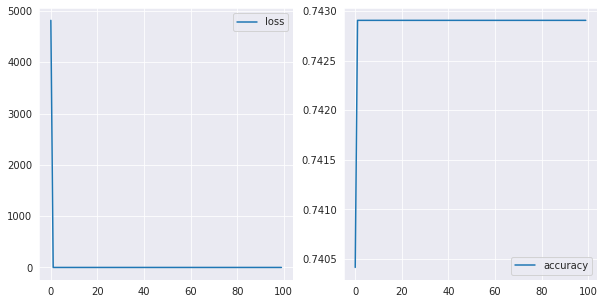

In [75]:
sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(x=results.epoch, y=sigmoid_accuracy, ax=ax2, label='accuracy');

In [78]:
from tensorflow.keras.optimizers import SGD

In [ ]:
# model = Sequential()

# sgd = SGD(lr=9) #9 is very high, usually start at 0.3 or 0.2
# model.add(Dense(12, activation='relu', input_dim=22500))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer=sgd,
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# results = model.fit(train_img, y_train,
#                     epochs=30, batch_size=10, verbose=1)

# relu_loss = results.history['loss']
# relu_accuracy = results.history['accuracy']

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# sns.lineplot(x=results.epoch, y=relu_loss, ax=ax1, label='loss')
# sns.lineplot(x=results.epoch, y=relu_accuracy, ax=ax2, label='accuracy');

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


522/522 [==============================] - 5s 8ms/step - loss: 679453491462144.0000 - accuracy: 0.7423
Epoch 2/30
522/522 [==============================] - 3s 7ms/step - loss: 0.5716 - accuracy: 0.7429
Epoch 3/30
522/522 [==============================] - 2s 5ms/step - loss: 0.5717 - accuracy: 0.7429
Epoch 4/30
522/522 [==============================] - 2s 5ms/step - loss: 0.5718 - accuracy: 0.7429
Epoch 5/30
522/522 [==============================] - 2s 4ms/step - loss: 0.5709 - accuracy: 0.7429
Epoch 6/30
522/522 [==============================] - 2s 4ms/step - loss: 0.5710 - accuracy: 0.7429
Epoch 7/30
522/522 [==============================] - 2s 5ms/step - loss: 0.5720 - accuracy: 0.7429
Epoch 8/30
522/522 [==============================] - 2s 5ms/step - loss: 0.5711 - accuracy: 0.7429
Epoch 9/30
522/522 [==============================] - 2s 5ms/step - loss: 0.5720 - accuracy: 0.7429
Epoch 10/30
522/522 [==============================] - 2s 5ms/step - loss: 0.5719 - accuracy: 0.7

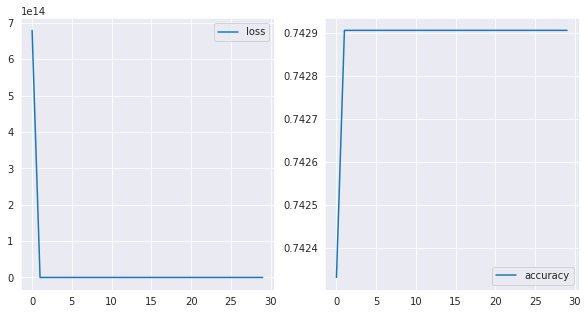

In [77]:
model = Sequential()

sgd = SGD(lr=0.3) #9 is very high, usually start at 0.3 or 0.2
model.add(Dense(12, activation='relu', input_dim=22500))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(train_img, y_train,
                    epochs=30, batch_size=10, verbose=1)

relu_loss = results.history['loss']
relu_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=relu_loss, ax=ax1, label='loss')
sns.lineplot(x=results.epoch, y=relu_accuracy, ax=ax2, label='accuracy');

In [ ]:
model = Sequential()

sgd = SGD(lr=0.4) #9 is very high, usually start at 0.3 or 0.2
model.add(Dense(12, activation='relu', input_dim=22500))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(train_img, y_train,
                    epochs=30, batch_size=10, verbose=1)

relu_loss = results.history['loss']
relu_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=relu_loss, ax=ax1, label='loss')
sns.lineplot(x=results.epoch, y=relu_accuracy, ax=ax2, label='accuracy');

Epoch 1/30
522/522 [==============================] - 4s 6ms/step - loss: 5.2814 - accuracy: 0.7178 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 2/30
522/522 [==============================] - 3s 5ms/step - loss: 0.6019 - accuracy: 0.7429 - val_loss: 0.7442 - val_accuracy: 0.5000
Epoch 3/30
522/522 [==============================] - 3s 5ms/step - loss: 0.5806 - accuracy: 0.7429 - val_loss: 0.7755 - val_accuracy: 0.5000
Epoch 4/30
522/522 [==============================] - 3s 5ms/step - loss: 0.5733 - accuracy: 0.7429 - val_loss: 0.7974 - val_accuracy: 0.5000
Epoch 5/30
522/522 [==============================] - 3s 5ms/step - loss: 0.5710 - accuracy: 0.7429 - val_loss: 0.8130 - val_accuracy: 0.5000
Epoch 6/30
522/522 [==============================] - 3s 5ms/step - loss: 0.5703 - accuracy: 0.7429 - val_loss: 0.8193 - val_accuracy: 0.5000
Epoch 7/30
522/522 [==============================] - 3s 5ms/step - loss: 0.5701 - accuracy: 0.7429 - val_loss: 0.8245 - val_accuracy: 0.5000
Epoch 

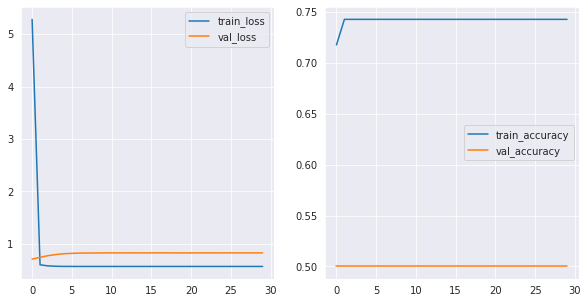

In [79]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=22500))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', #adam optimizes everytthing 
              loss='binary_crossentropy',
              metrics=['accuracy'])

#This is adding our validation split. #adding in validation data 
results = model.fit(train_img, y_train,
                   validation_data=(val_img, y_val),
                   epochs=30, batch_size=10)

train_loss = results.history['loss'] #what we want to look at, this and below 
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy');

### Connecting with sklearn

In [80]:
def build_model():
    model = Sequential()
    model.add(Dense(12, activation='relu', input_dim=22500))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
keras_model = scikit_learn.KerasClassifier(build_model,
                                          epochs=50,
                                          batch_size=32,
                                          verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


In [83]:
cross_val_score(keras_model, train_img, y_train)

Epoch 1/50
131/131 - 2s - loss: 6.6119 - accuracy: 0.5455 - 2s/epoch - 14ms/step
Epoch 2/50
131/131 - 1s - loss: 0.6781 - accuracy: 0.6786 - 973ms/epoch - 7ms/step
Epoch 3/50
131/131 - 1s - loss: 0.6647 - accuracy: 0.6786 - 985ms/epoch - 8ms/step
Epoch 4/50
131/131 - 1s - loss: 0.6542 - accuracy: 0.6786 - 962ms/epoch - 7ms/step
Epoch 5/50
131/131 - 1s - loss: 0.6463 - accuracy: 0.6786 - 954ms/epoch - 7ms/step
Epoch 6/50
131/131 - 1s - loss: 0.6405 - accuracy: 0.6786 - 978ms/epoch - 7ms/step
Epoch 7/50
131/131 - 1s - loss: 0.6364 - accuracy: 0.6786 - 974ms/epoch - 7ms/step
Epoch 8/50
131/131 - 1s - loss: 0.6335 - accuracy: 0.6786 - 954ms/epoch - 7ms/step
Epoch 9/50
131/131 - 1s - loss: 0.6315 - accuracy: 0.6786 - 920ms/epoch - 7ms/step
Epoch 10/50
131/131 - 1s - loss: 0.6302 - accuracy: 0.6786 - 914ms/epoch - 7ms/step
Epoch 11/50
131/131 - 1s - loss: 0.6293 - accuracy: 0.6786 - 921ms/epoch - 7ms/step
Epoch 12/50
131/131 - 1s - loss: 0.6288 - accuracy: 0.6786 - 923ms/epoch - 7ms/step
Epo

array([1.        , 1.        , 1.        , 0.71428573, 0.        ])

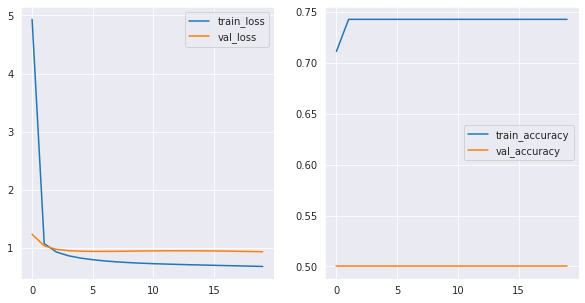

In [84]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=22500))

# We can add L2 (or L1) regularization right into
# the layer with the kernel_regularizer parameter.

model.add(Dense(20, activation='relu',
                kernel_regularizer=l2(l2=0.05)))

# Note that there is also a bias_regularizer,
# but this tends to have less effect.

model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(train_img, y_train, epochs=20, batch_size=32,
                    verbose=0, validation_data=(val_img, y_val))

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy');

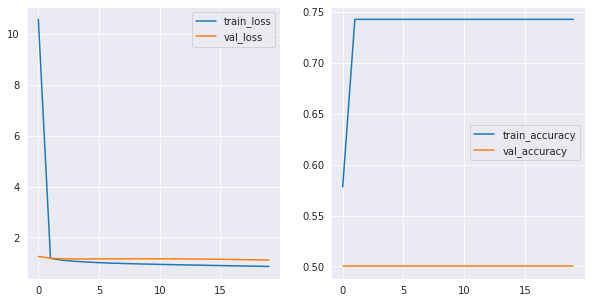

In [88]:
model = Sequential()
model.add(Dense(30, activation='relu',
                input_dim=22500))
model.add(Dense(20, activation='relu',
                kernel_regularizer=l2(l2=0.01)))

model.add(Dense(12, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(12, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(12, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(8, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(4, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(train_img, y_train, epochs=20, batch_size=32,
                    verbose=0, validation_data=(val_img, y_val))

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy');

In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)